# Análise da evolução da carteira de crédito das cooperativas por UF do Brasil 



O objetivo desta análise é identificar a participação do cooperativismo de crédito no Brasil e sua evolução no decorrer do tempo. 

base de dados:
a base de dados está disponibilizada pelo Bacen no formato CSV. em: 
https://dadosabertos.bcb.gov.br/dataset/scr_data



In [10]:
# as bibliotecas disponíveis para plotar os gráficos e manupulação dedados:
import pandas as pd
#import plotly.express as px
# Biblioteca para plotar mapa com gráfico de calor
##import folium
f#rom folium.plugins import HeatMap
#from folium import plugins
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# carregar bancos de dados
# foram carregados os dados dos últimos 12 meses movimento que foram criados em arquivo python separados
df = pd.read_csv(r"D:\Projetos_Analytics\01.cooperativas\01.Coop_Brasil\base.csv")

In [3]:
#Preparação dos dados

dados = df
#transformar a coluna database, de string para datatime
dados['data_base'] = pd.to_datetime(dados['data_base'], format='%Y-%m-%d')
# Deletar colunas desnecessárias para análise
dados = dados.drop(columns=[ 'ocupacao', 'cnae_secao', 'cnae_subclasse', 'porte',
'a_vencer_ate_90_dias', 'a_vencer_de_91_ate_360_dias', 'a_vencer_de_361_ate_1080_dias', 
'a_vencer_de_1081_ate_1800_dias','a_vencer_acima_de_5400_dias', 'vencido_acima_de_15_dias',
])
dados = dados.drop(columns=[ 'origem', 'indexador', 'numero_de_operacoes', 'a_vencer_de_1801_ate_5400_dias'])
# transformar as colunas numéricas, que estão no formato string para float.
## Os números estão separados por virgulas, por isto foi usado repleace para transformar virgula em ponto 
dados['carteira_ativa'] = dados['carteira_ativa'].str.replace(',', '.').astype(float)
dados['carteira_inadimplida_arrastada'] = dados['carteira_inadimplida_arrastada'].str.replace(',', '.').astype(float)
dados['ativo_problematico'] = dados['ativo_problematico'].str.replace(',', '.').astype(float)


Preparar os dados para analisar a carteira geral por estado por tipo de instituição e postetiormente comparar com o cooperativismo.
será criado uma visão do total por estado e sua evolução e uma visão da share do cooperativimo por estado e sua evolução.


# envidamento total por estados:


In [24]:
# Total do envidamento por estados:
## Agrupar
dados_group = dados.groupby(['data_base', 'uf'])[['carteira_ativa', 'carteira_inadimplida_arrastada']].sum().reset_index()
dados_group = dados_group.loc[dados_group['data_base']== '2023-05-31 00:00:00']
dados_group = dados_group.rename(columns  = {'uf': 'sigla'})
dados_group = dados_group[['sigla', 'carteira_ativa']]

C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


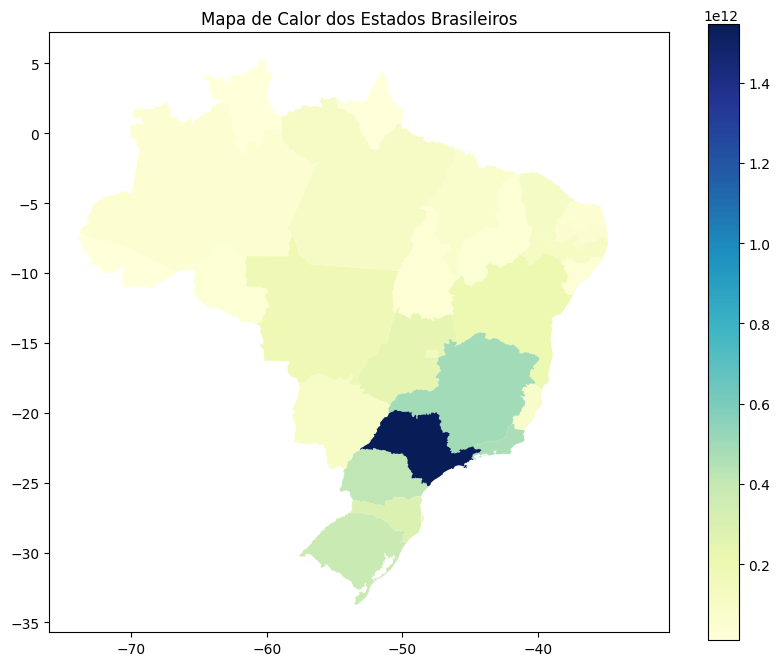

In [31]:
# Carregue o shapefile dos estados brasileiros
#arquivo disponível para dowload em:
#  https://docs.google.com/file/d/0B__Rg9h09RtfQU9jbEpxcW9xREk/edit?pli=1&resourcekey=0-po0pdYgc-QZ5Pt13twjIsg
brasil = gpd.read_file(r"D:\Projetos_Analytics\01.cooperativas\estados_2010\estados_2010.shp")
# Combine o DataFrame dos estados com o DataFrame do mapa de calor
brasil = brasil.merge(dados_group, on='sigla',how='left')
# Plote o mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
brasil.plot(column='carteira_ativa', cmap='YlGnBu', ax=ax, legend=True)
plt.title('Mapa de Calor dos Estados Brasileiros')
plt.show()


Comentários:
    A região sudeste é onde existe maior carteira de crédito, principalmente no município de São Paulo.

# carteira do cooperativismo:


In [36]:
#Filtrar cooperativas:
dados2 = dados
dados2 = dados2.loc[dados2['tcb'] == 'Cooperativas']

# Total do envidamento por estados:
## Agrupar
dados_coop = dados2.groupby(['data_base', 'uf'])[['carteira_ativa', 'carteira_inadimplida_arrastada']].sum().reset_index()
dados_coop = dados_coop.loc[dados_coop['data_base']== '2023-05-31 00:00:00']
dados_coop = dados_coop.rename(columns  = {'uf': 'sigla'})
dados_coop = dados_coop[['sigla', 'carteira_ativa']]

C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


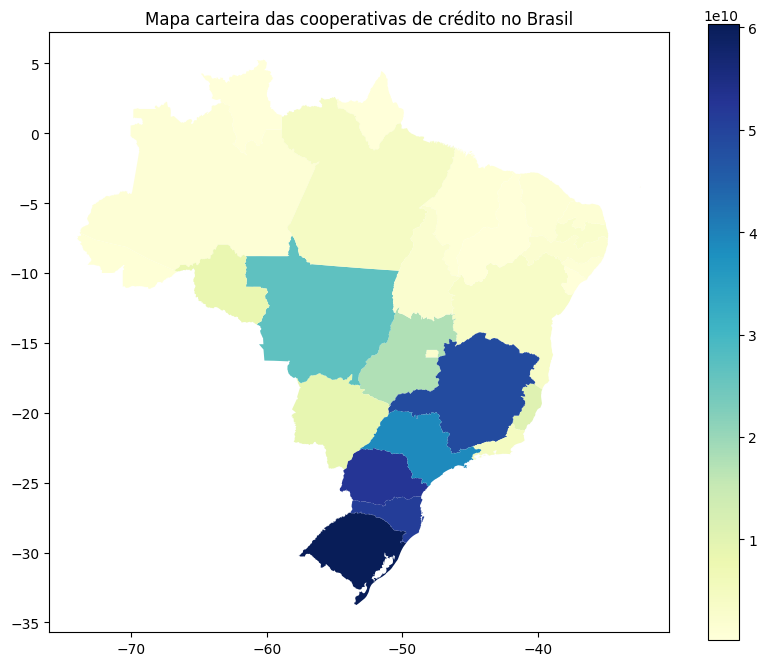

In [38]:
# Carregue o shapefile dos estados brasileiros
brasil2 = gpd.read_file(r"D:\Projetos_Analytics\01.cooperativas\estados_2010\estados_2010.shp")

# Combine o DataFrame dos estados com o DataFrame do mapa de calor
brasil_coop = brasil2.merge(dados_coop, on='sigla',how='left')

# Plote o mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
brasil_coop.plot(column='carteira_ativa', cmap='YlGnBu', ax=ax, legend=True)
plt.title('Mapa carteira das cooperativas de crédito no Brasil')
plt.show()


Obs: 
    O cooperativismo de crédito tem maior concentração nas regiões sul e sudeste do Brasil, sendo maior na região sul e em terceiro lugar na região centroeste
